In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

DATA LOADING

In [17]:
data = pd.read_csv("./data.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


DATA CLEANING

In [18]:
data = data.drop(["PassengerId","Cabin","Ticket"], axis=1)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [20]:
data["Age"].fillna(data["Age"].mean(), inplace=True)
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_24912\3000327043.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Age"].fillna(data["Age"].mean(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_24912\3000327043.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [24]:
data["Sex"] = data["Sex"].map({"male": 0, "female": 1})

In [25]:
data["Embarked"] = data["Embarked"].map({"S": 0, "C": 1, "Q": 2})

In [26]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0


In [27]:
data["Name"] = data["Name"].str.split(",").str[1].str.strip()

In [29]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Mr. Owen Harris,0,22.0,1,0,7.2500,0
1,1,1,Mrs. John Bradley (Florence Briggs Thayer),1,38.0,1,0,71.2833,1
2,1,3,Miss. Laina,1,26.0,0,0,7.9250,0
3,1,1,Mrs. Jacques Heath (Lily May Peel),1,35.0,1,0,53.1000,0
4,0,3,Mr. William Henry,0,35.0,0,0,8.0500,0


In [30]:
data["First_Name"] = data["Name"].str.split(" ").str[1].str.strip()

In [32]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,First_Name
0,0,3,Mr. Owen Harris,0,22.0,1,0,7.2500,0,Owen
1,1,1,Mrs. John Bradley (Florence Briggs Thayer),1,38.0,1,0,71.2833,1,John
2,1,3,Miss. Laina,1,26.0,0,0,7.9250,0,Laina
3,1,1,Mrs. Jacques Heath (Lily May Peel),1,35.0,1,0,53.1000,0,Jacques
4,0,3,Mr. William Henry,0,35.0,0,0,8.0500,0,William


DATA VISUALIZATION

Survival rate overall - Countplot / Pie

In [36]:
Total_Passengers = len(data)
Total_Passengers

891

In [41]:
Total_Survived = len(data[data['Survived'] == 1])
Total_Survived

342

<Axes: xlabel='Survived', ylabel='count'>

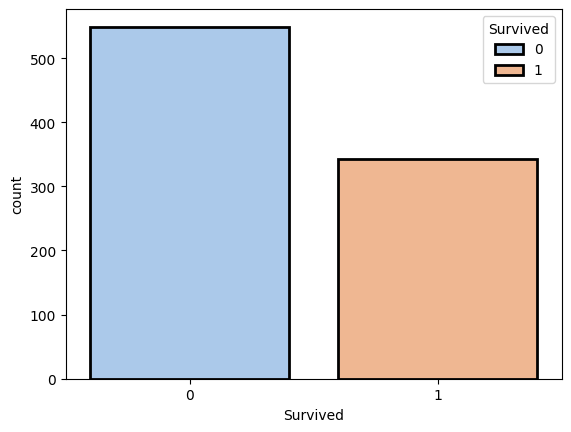

In [51]:
sns.countplot(data=data,x="Survived",hue="Survived",palette="pastel",edgecolor="black",linewidth=2)

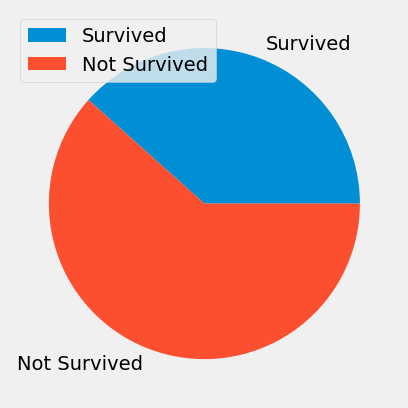

In [64]:
plt.style.use("fivethirtyeight")
plt.pie([Total_Survived, Total_Passengers-Total_Survived], labels=["Survived", "Not Survived"])
plt.legend()

Survival by Gender - Countplot

<Axes: xlabel='Sex', ylabel='count'>

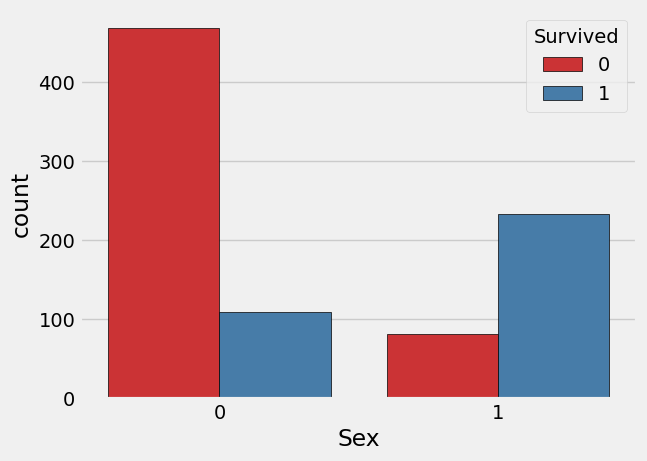

In [66]:
sns.countplot(x="Sex",hue="Survived", palette="Set1", edgecolor="black", data=data)

Age Distribution of Survivors vs Non Survivors - KDE/HISTOGRAM

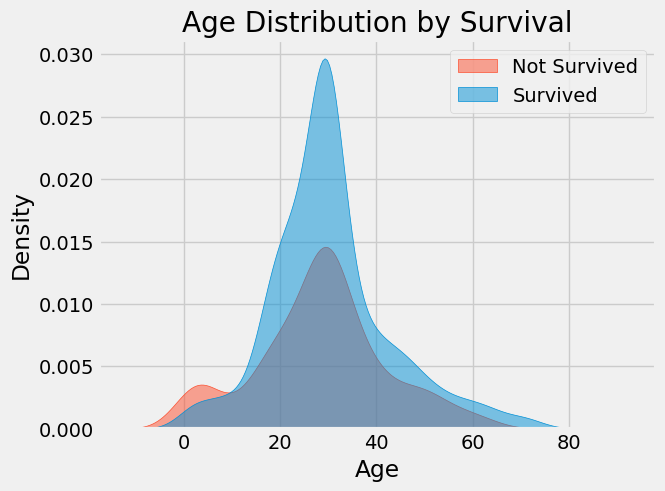

In [73]:
sns.kdeplot(data=data,x="Age",hue="Survived",fill=True,alpha=0.5)
plt.legend(labels=['Not Survived', 'Survived'])  # Optional legend override
plt.title("Age Distribution by Survival")
plt.show()

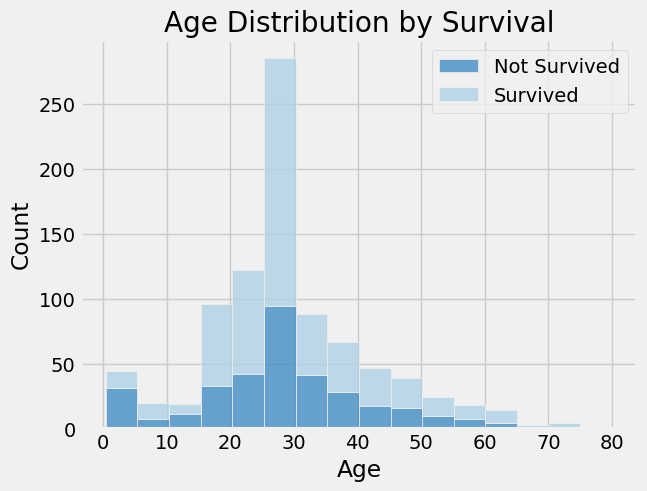

In [77]:
sns.histplot(data=data,x="Age",hue="Survived",multiple="stack",binwidth=5,palette="Blues")
plt.legend(labels=['Not Survived', 'Survived'])  # Optional legend override
plt.title("Age Distribution by Survival")
plt.show()

FARE VS SURVIVAL - Boxplot/Violinplot

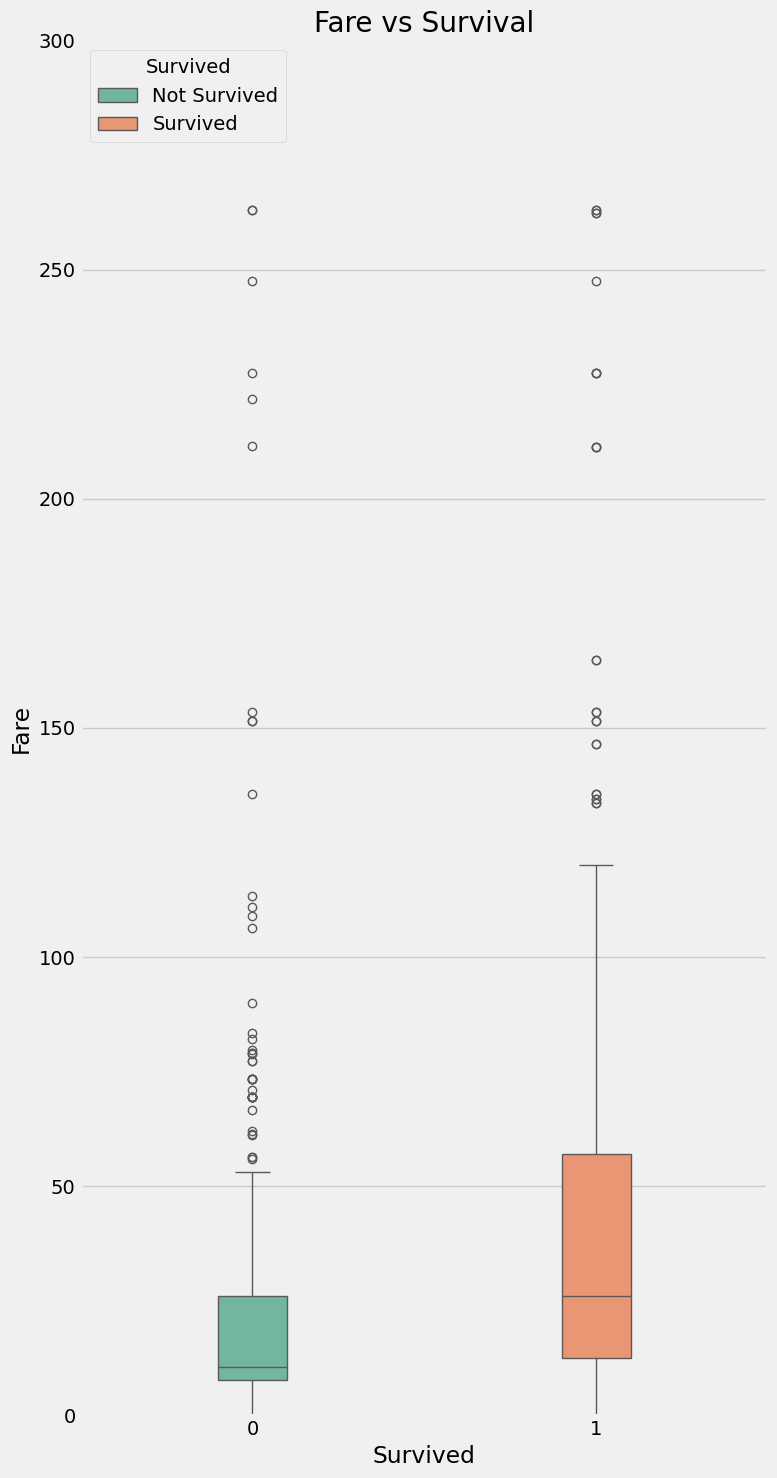

In [97]:
plt.figure(figsize=(8,15))

sns.boxplot(data=data,x="Survived",y="Fare",hue="Survived",palette="Set2",width=0.2)
plt.ylim(0,300)
plt.legend(title="Survived", labels=["Not Survived", "Survived"])
plt.title("Fare vs Survival")
plt.tight_layout()


Survival by Class - BarPlot

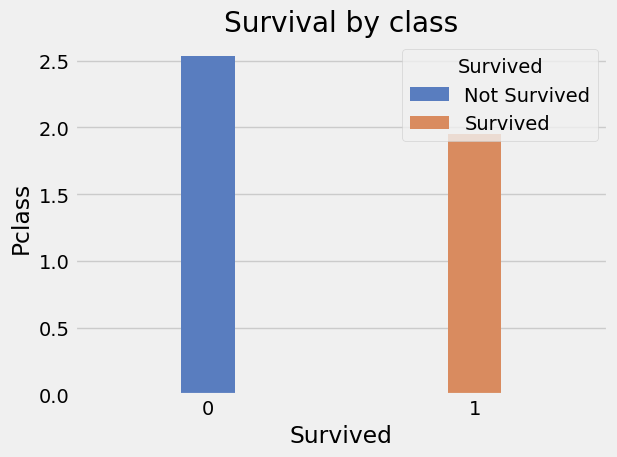

In [101]:
sns.barplot(data=data,x="Survived",y="Pclass",hue="Survived",width=0.2,palette="muted",errorbar=None)
plt.legend(loc="upper right",title="Survived", labels=["Not Survived", "Survived"])
plt.title("Survival by class")
plt.tight_layout()

Correlation Heatmap

In [102]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,First_Name
0,0,3,Mr. Owen Harris,0,22.0,1,0,7.2500,0,Owen
1,1,1,Mrs. John Bradley (Florence Briggs Thayer),1,38.0,1,0,71.2833,1,John
2,1,3,Miss. Laina,1,26.0,0,0,7.9250,0,Laina
3,1,1,Mrs. Jacques Heath (Lily May Peel),1,35.0,1,0,53.1000,0,Jacques
4,0,3,Mr. William Henry,0,35.0,0,0,8.0500,0,William


In [107]:
data_pivot = data.pivot_table(index="Pclass", columns="Embarked", values="Survived", aggfunc="sum")
data_pivot

Embarked,0,1,2
Pclass,,,
1,76,59,1
2,76,9,2
3,67,25,27


<Axes: xlabel='Embarked', ylabel='Pclass'>

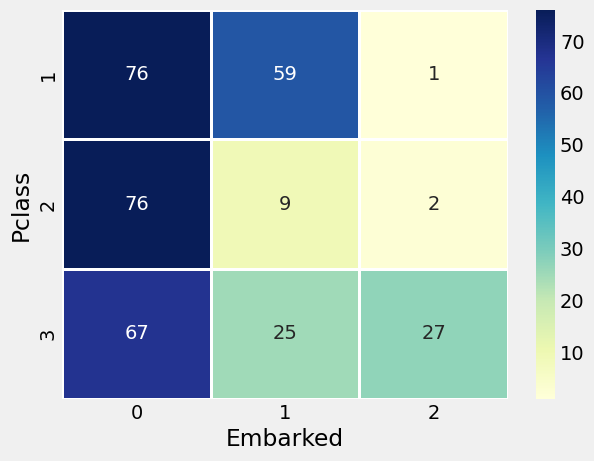

In [112]:
sns.heatmap(data=data_pivot,annot=True,fmt="d",cmap="YlGnBu",edgecolor="w",linewidths=1)

Survival by Family - Violin Plot

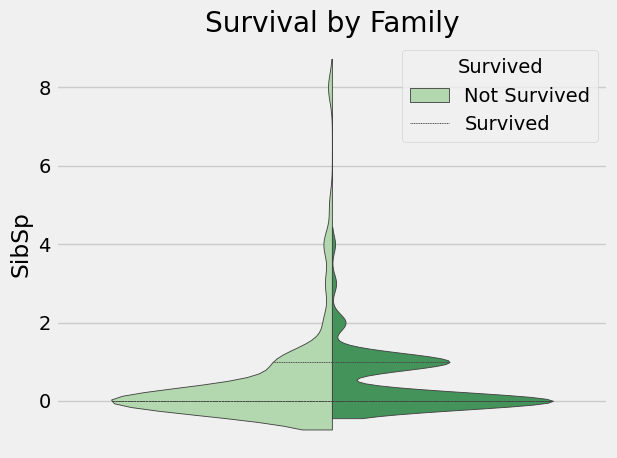

In [121]:
sns.violinplot(y="SibSp", hue="Survived", data=data,palette="Greens",split=True,inner="quartile")
plt.legend(loc="upper right",title="Survived", labels=["Not Survived", "Survived"])
plt.title("Survival by Family")
plt.tight_layout()